In [3]:
%run jupyterutils.py

from algorithms.supervised.linear_regression.LinearRegression import LinearRegression

### Linear Regression with single feature
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [4]:
x = sp.Symbol('x')
y = 0.8 * x + 0.6
print("y = ", end='')
sp.pprint(y)


y = 0.8⋅x + 0.6


In [5]:
def ModelEquation(input):
    return 0.8*input+0.6

In [6]:
total_data_points = 50000
x = np.linspace(0, 2, total_data_points)
y = ModelEquation(x)

perm = np.random.permutation(len(x))
x = x[perm]
y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [7]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = ensure_column_vector(np.array(x[:training_numbers]))
training_labels = np.array(y[:training_numbers])

testing_attributes=ensure_column_vector(np.array(x[training_numbers:]))
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 1)
(7500, 1)
(42500,)
(7500,)


##### Model Training

Iteration  0  weights  [[0.54316137]]  bias  0.00017139088556849128 loss 0.7563792097271941


Iteration  1000  weights  [[0.69487423]]  bias  0.1402391314599428 loss 0.32301669592999344
Iteration  2000  weights  [[0.7911355]]  bias  0.232970593138462 loss 0.1414344893893165
Iteration  3000  weights  [[0.85159758]]  bias  0.2950297206774368 loss 0.06514005755959602
Iteration  4000  weights  [[0.88896584]]  bias  0.33719321258437523 loss 0.03288663015126809
Iteration  5000  weights  [[0.91145383]]  bias  0.3664310750808044 loss 0.019066927113950454
Iteration  6000  weights  [[0.92437078]]  bias  0.3872518887939299 loss 0.012973846107199287
Iteration  7000  weights  [[0.93114808]]  bias  0.40257264616547755 loss 0.010129800589418729
Iteration  8000  weights  [[0.93400294]]  bias  0.41428118109683804 loss 0.008661699525614974
Iteration  9000  weights  [[0.93436758]]  bias  0.4235998318279024 loss 0.007785400797224494
Iteration  10000  weights  [[0.93316665]]  bias  0.4313205832088501 loss 0.007172090108287156
Iteration  11000  weights  [[0.9309967]]  bias  0.4379571088145212 loss 0

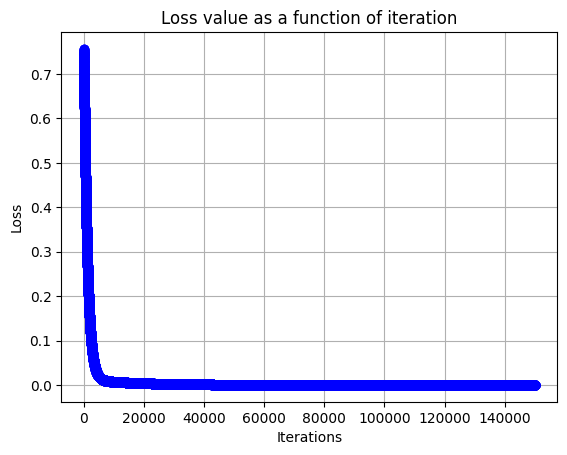

In [8]:
model = LinearRegression(training_features, training_labels , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

plotLineGraph("Iterations", "Loss", "Loss value as a function of iteration",x,values)



#### Prediction Details

In [9]:
print("Predicted weights ", model.weight, " bias ", model.bias)
print("Prediction loss", model.calculateMseLoss(ModelEquation(testing_attributes),model.predict(testing_attributes)))

Predicted weights  [[0.80192322]]  bias  0.597730455568235
Prediction loss 1.3550752258734699e-06
